In [22]:
import pandas as pd
data_path='../data/Transaction_Data.csv'

try:
    df=pd.read_csv(data_path, header=0)
    print(df.head(5))
except Exception as e:
    print(f"Error Loading CSV: {e}")

        Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0     March'25  40632468    2571551     7934167    56726423    565567.8   
1  February'25  40346611    2653977     7562366    43238584    408127.0   
2   January'25  40093882    2706098     7547244    42458039    393176.2   
3  December'24  39574049    2674512     7544985    44842543    407028.1   
4  November'24  39193282    2612063     7365236    41974856    365662.1   

   CCT_Number  CCT_Amount  PCT_Number  PCT_Amount  TIC_Number  TCT_Amount  
0     5946347     38028.3      941748      6236.3    63614518    609832.4  
1     6696521     31171.1      700809      4423.3    50635914    443721.4  
2     5411184     33968.4      761341      4825.3    48630564    431969.9  
3     5638006     35321.0      745972      4563.6    51226521    446912.7  
4     5219817     30996.2      704420      4281.6    47899093    400939.8  


In [23]:
print(df.head())

        Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0     March'25  40632468    2571551     7934167    56726423    565567.8   
1  February'25  40346611    2653977     7562366    43238584    408127.0   
2   January'25  40093882    2706098     7547244    42458039    393176.2   
3  December'24  39574049    2674512     7544985    44842543    407028.1   
4  November'24  39193282    2612063     7365236    41974856    365662.1   

   CCT_Number  CCT_Amount  PCT_Number  PCT_Amount  TIC_Number  TCT_Amount  
0     5946347     38028.3      941748      6236.3    63614518    609832.4  
1     6696521     31171.1      700809      4423.3    50635914    443721.4  
2     5411184     33968.4      761341      4825.3    48630564    431969.9  
3     5638006     35321.0      745972      4563.6    51226521    446912.7  
4     5219817     30996.2      704420      4281.6    47899093    400939.8  


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Period      76 non-null     object 
 1   IC_Debit    76 non-null     int64  
 2   IC_Credit   76 non-null     int64  
 3   IC_Prepaid  76 non-null     int64  
 4   DCT_Number  76 non-null     int64  
 5   DCT_Amount  76 non-null     float64
 6   CCT_Number  76 non-null     int64  
 7   CCT_Amount  76 non-null     float64
 8   PCT_Number  76 non-null     int64  
 9   PCT_Amount  76 non-null     float64
 10  TIC_Number  76 non-null     int64  
 11  TCT_Amount  76 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 7.3+ KB
None


In [25]:
df['Period'].unique()[:10]

array(["March'25", "February'25", "January'25", "December'24",
       "November'24", "October'24", "September'24", "August'24",
       "July'24", "June'24"], dtype=object)

In [26]:
def parse_period(period):
    try:
        month=period.split("'")[0]
        year= period.split("'")[1]
        fullyear=int(f"20{year}")
        return pd.to_datetime(f"{month} 1 {fullyear}", format='%B %d %Y')
    except Exception as e:
        print(f"Warning:Could Not parse {period}. Error: {e}")
        return pd.NaT
df['Period']=df['Period'].apply(parse_period)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Period      76 non-null     datetime64[ns]
 1   IC_Debit    76 non-null     int64         
 2   IC_Credit   76 non-null     int64         
 3   IC_Prepaid  76 non-null     int64         
 4   DCT_Number  76 non-null     int64         
 5   DCT_Amount  76 non-null     float64       
 6   CCT_Number  76 non-null     int64         
 7   CCT_Amount  76 non-null     float64       
 8   PCT_Number  76 non-null     int64         
 9   PCT_Amount  76 non-null     float64       
 10  TIC_Number  76 non-null     int64         
 11  TCT_Amount  76 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 7.3 KB
None
      Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0 2025-03-01  40632468    2571551     7934167    56726423    565567.8   
1 202

In [30]:
df.dropna(subset=['Period'],inplace=True)


In [31]:
df.sort_values(by='Period',inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Period      76 non-null     datetime64[ns]
 1   IC_Debit    76 non-null     int64         
 2   IC_Credit   76 non-null     int64         
 3   IC_Prepaid  76 non-null     int64         
 4   DCT_Number  76 non-null     int64         
 5   DCT_Amount  76 non-null     float64       
 6   CCT_Number  76 non-null     int64         
 7   CCT_Amount  76 non-null     float64       
 8   PCT_Number  76 non-null     int64         
 9   PCT_Amount  76 non-null     float64       
 10  TIC_Number  76 non-null     int64         
 11  TCT_Amount  76 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 7.3 KB
None
      Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0 2018-12-01  15069435    1349842      243432    16692928    124488.8   
1 201

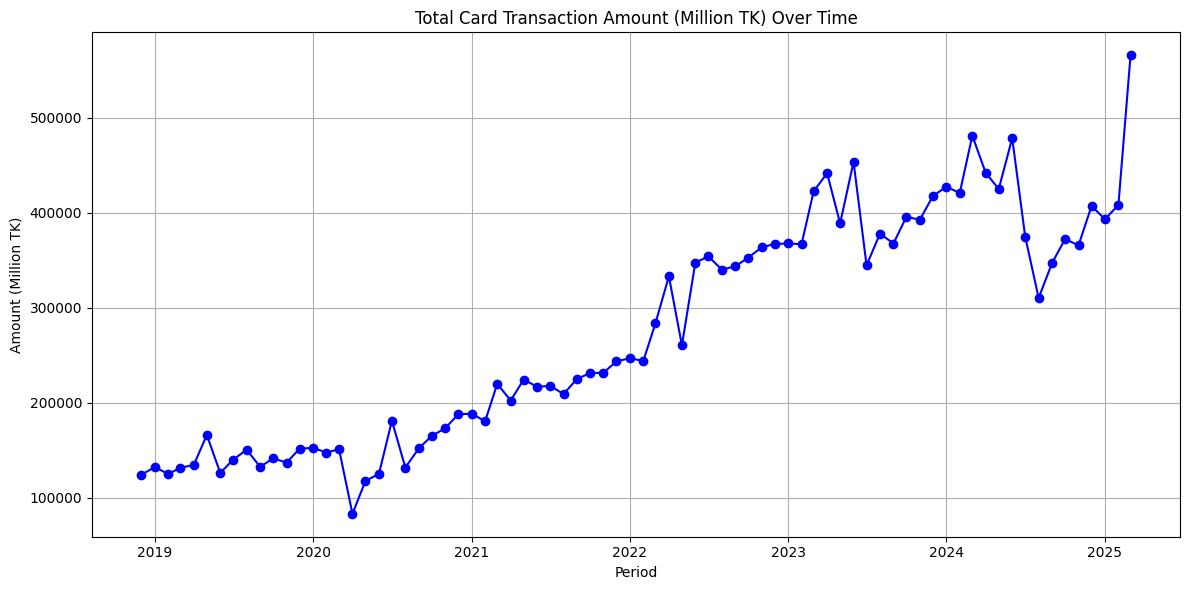

In [36]:
import matplotlib.pyplot as plt
import numpy as np
df_plot = df.set_index('Period')

plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['DCT_Amount'], marker='o', linestyle='-', color='b')
plt.title('Total Card Transaction Amount (Million TK) Over Time')
plt.xlabel('Period')
plt.ylabel('Amount (Million TK)')
plt.grid(True)
plt.tight_layout()
plt.show()

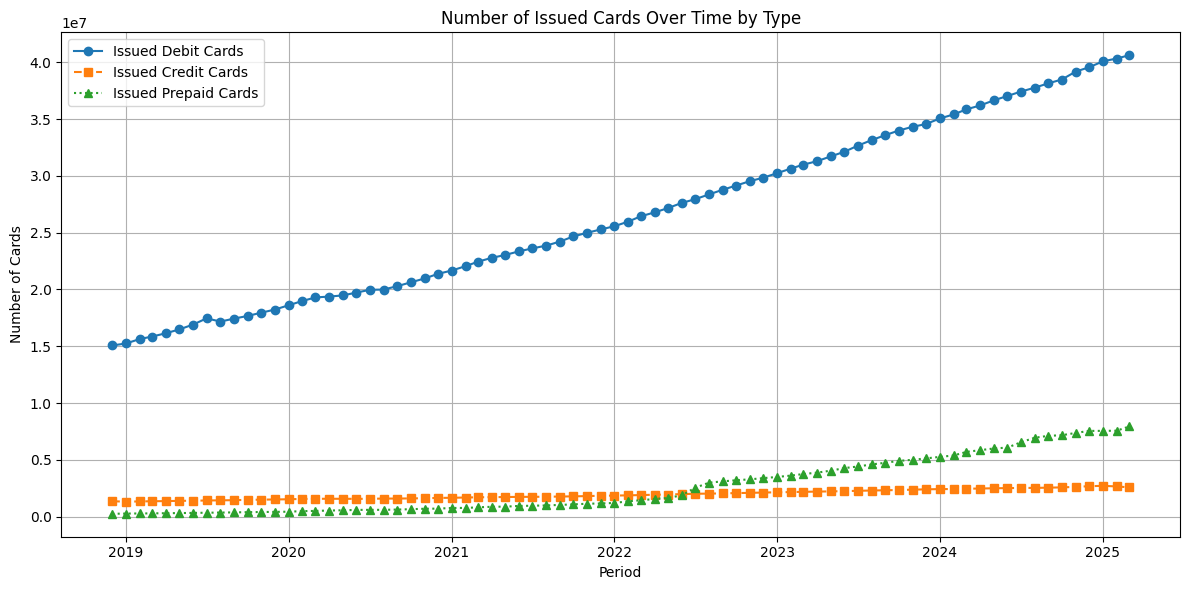

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['IC_Debit'], label='Issued Debit Cards', marker='o', linestyle='-')
plt.plot(df_plot.index, df_plot['IC_Credit'], label='Issued Credit Cards', marker='s', linestyle='--')
plt.plot(df_plot.index, df_plot['IC_Prepaid'], label='Issued Prepaid Cards', marker='^', linestyle=':')
plt.title('Number of Issued Cards Over Time by Type')
plt.xlabel('Period')
plt.ylabel('Number of Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

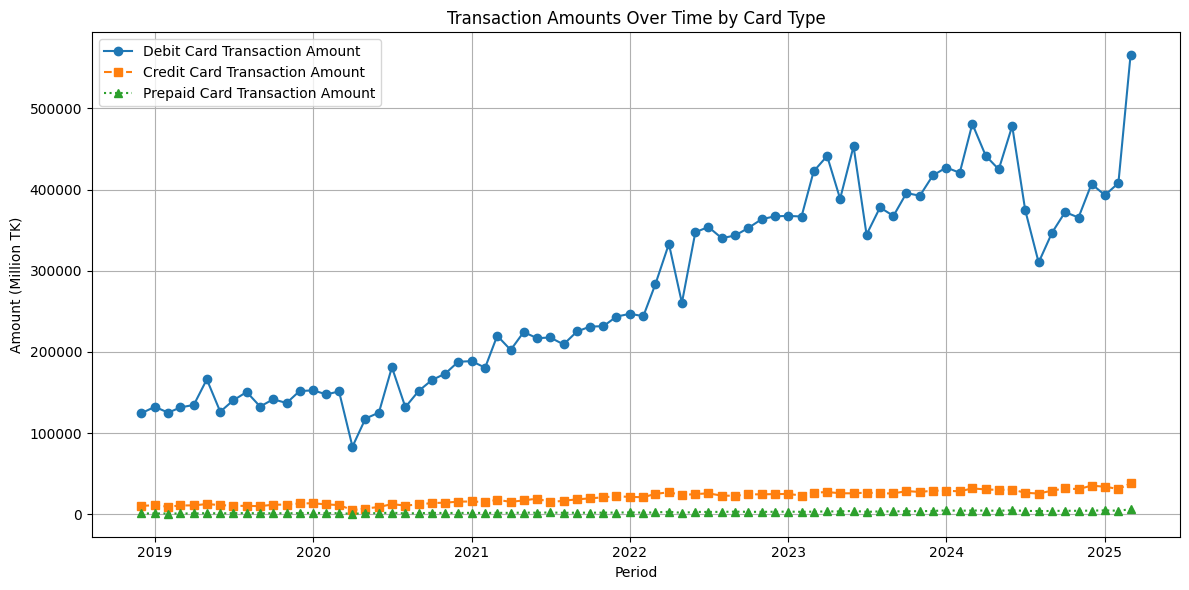

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['DCT_Amount'], label='Debit Card Transaction Amount', marker='o', linestyle='-')
plt.plot(df_plot.index, df_plot['CCT_Amount'], label='Credit Card Transaction Amount', marker='s', linestyle='--')
plt.plot(df_plot.index, df_plot['PCT_Amount'], label='Prepaid Card Transaction Amount', marker='^', linestyle=':')
plt.title('Transaction Amounts Over Time by Card Type')
plt.xlabel('Period')
plt.ylabel('Amount (Million TK)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

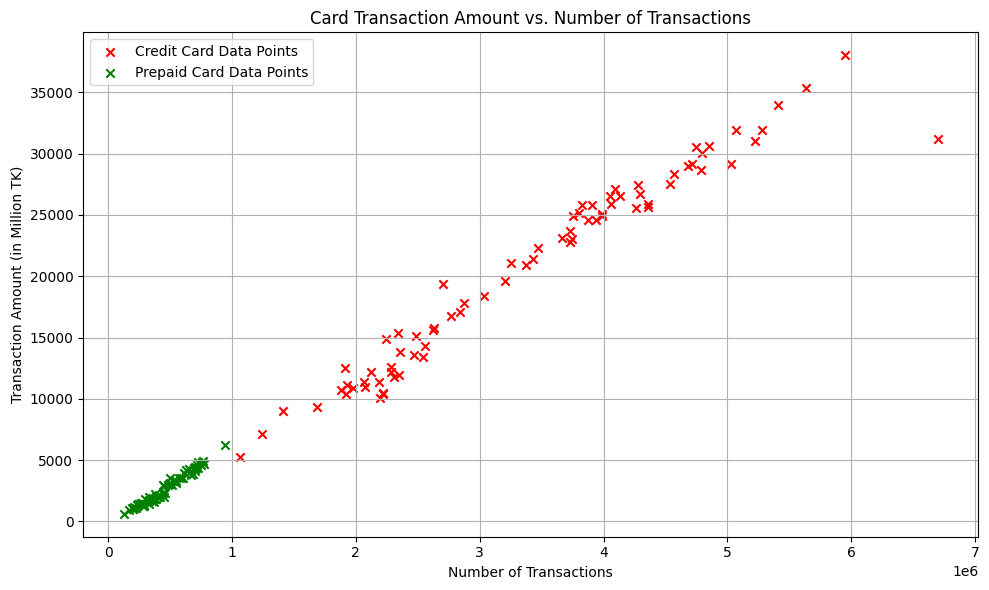

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CCT_Number'], df['CCT_Amount'], marker='x', c='r', label='Credit Card Data Points')
plt.scatter(df['DCT_Number'], df['DCT_Amount'], marker='x', c='b', label='Debit Card Data Points')
plt.scatter(df['PCT_Number'], df['PCT_Amount'], marker='x', c='g', label='Prepaid Card Data Points')

plt.title('Card Transaction Amount vs. Number of Transactions')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

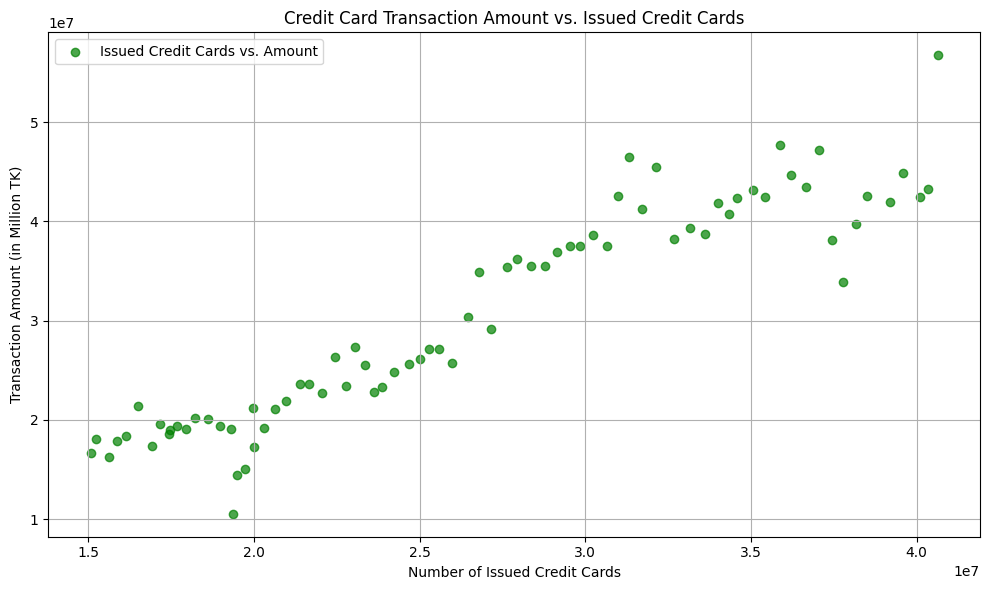

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['IC_Debit'], df['DCT_Number'], marker='o', c='g', alpha=0.7, label='Issued Credit Cards vs. Amount')
plt.title('Credit Card Transaction Amount vs. Issued Credit Cards')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Issued Credit Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()